In [1]:
data = read.csv("Project Data.csv")

In [2]:
summary(data)

 Gender     Nationality       PlaceofBirth       StageID        Topic    
 F:175   KW       :179   Kuwait     :180   Elementary:199   IT     : 95  
 M:305   Jordan   :172   Jordan     :176   High      : 33   French : 65  
         Palestine: 28   Iraq       : 22   Middle    :248   Arabic : 59  
         Iraq     : 22   Lebanon    : 19                    Science: 51  
         lebanon  : 16   SaudiArabia: 16                    English: 45  
         Tunis    : 12   USA        : 16                    Biology: 30  
         (Other)  : 51   (Other)    : 51                    (Other):135  
 Semester  Raisedhands     Visted.Resources AnnouncementsView  Discussions   
 F:245    Min.   :  0.00   Min.   : 0.0     Min.   : 0.00     Min.   : 1.00  
 S:235    1st Qu.: 15.75   1st Qu.:20.0     1st Qu.:14.00     1st Qu.:20.00  
          Median : 50.00   Median :65.0     Median :33.00     Median :39.00  
          Mean   : 46.77   Mean   :54.8     Mean   :37.92     Mean   :43.28  
          3rd Qu.:

In [3]:
nrow(data)

[1] 480

In [4]:
training_entries <- sample(480,360)

In [5]:
training <- data[training_entries,]
testing <- data[-training_entries, ]

# Can I create a model that will predict the number of raised hands based off a students StageID, absences, Visited.Resources, and class size? (Multilinear Regression)

In [15]:
model = lm(Raisedhands ~ StageID + Absences + Visted.Resources + Class.Size, data=training)

In [16]:
model = step(model, direction = "backward", trace = 0)
summary(model)


Call:
lm(formula = Raisedhands ~ StageID + Visted.Resources + Class.Size, 
    data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.138 -11.039   0.459  11.801  56.327 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       31.77904    4.40940   7.207 3.48e-12 ***
StageIDHigh       -0.13038    4.39966  -0.030 0.976375    
StageIDMiddle      8.79303    2.26221   3.887 0.000121 ***
Visted.Resources   0.41820    0.04758   8.790  < 2e-16 ***
Class.SizeL      -26.50676    4.11110  -6.448 3.73e-10 ***
Class.SizeM      -12.57573    2.81668  -4.465 1.08e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.36 on 354 degrees of freedom
Multiple R-squared:  0.5719,	Adjusted R-squared:  0.5658 
F-statistic: 94.56 on 5 and 354 DF,  p-value: < 2.2e-16


In [17]:
predictions = predict(model)
resid = residuals(model)

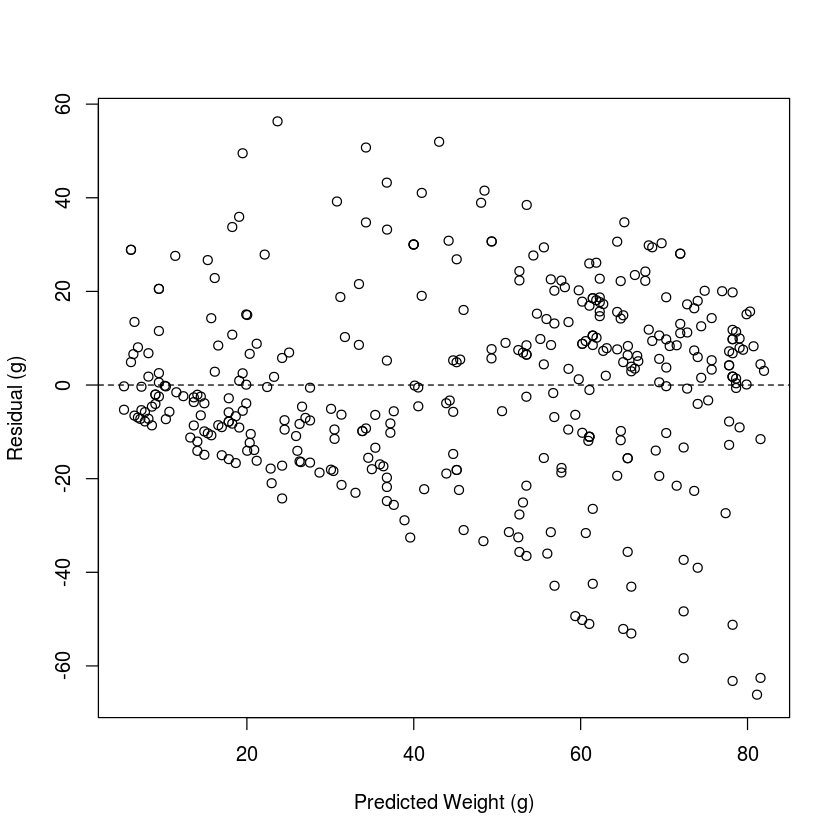

In [18]:
plot(predictions,
     resid,
     xlab="Predicted Weight (g)",
     ylab="Residual (g)")
abline(0,0, lty=2)

There is a clear linear line from the bottom left to right of the graph. 

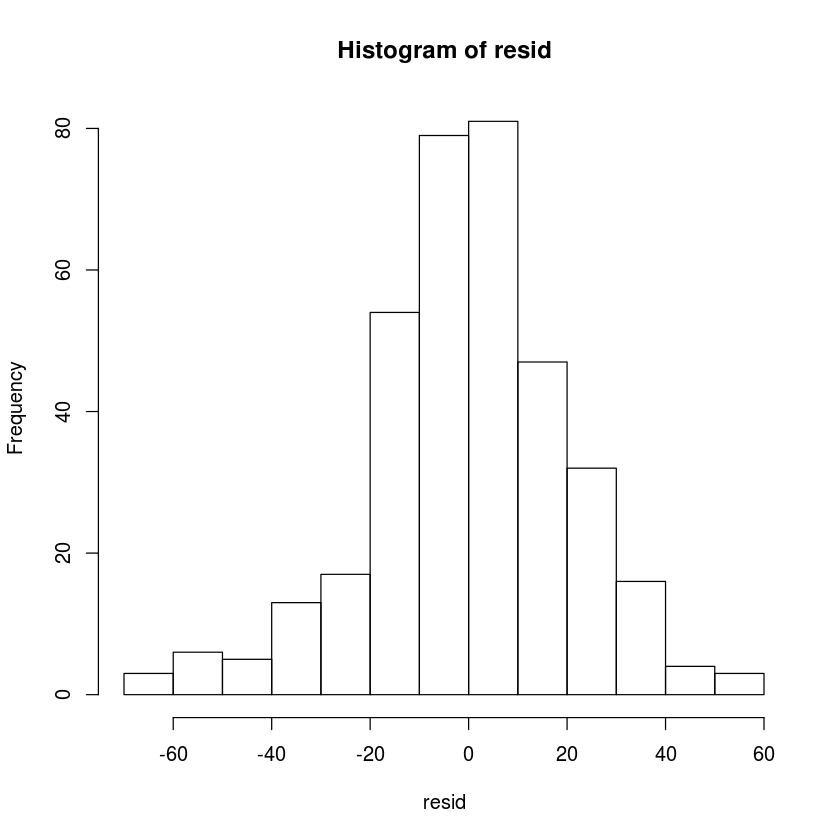

In [19]:
hist(resid)

In [20]:
summary(data)

 Gender     Nationality       PlaceofBirth       StageID        Topic    
 F:175   KW       :179   Kuwait     :180   Elementary:199   IT     : 95  
 M:305   Jordan   :172   Jordan     :176   High      : 33   French : 65  
         Palestine: 28   Iraq       : 22   Middle    :248   Arabic : 59  
         Iraq     : 22   Lebanon    : 19                    Science: 51  
         lebanon  : 16   SaudiArabia: 16                    English: 45  
         Tunis    : 12   USA        : 16                    Biology: 30  
         (Other)  : 51   (Other)    : 51                    (Other):135  
 Semester  Raisedhands     Visted.Resources AnnouncementsView  Discussions   
 F:245    Min.   :  0.00   Min.   : 0.0     Min.   : 0.00     Min.   : 1.00  
 S:235    1st Qu.: 15.75   1st Qu.:20.0     1st Qu.:14.00     1st Qu.:20.00  
          Median : 50.00   Median :65.0     Median :33.00     Median :39.00  
          Mean   : 46.77   Mean   :54.8     Mean   :37.92     Mean   :43.28  
          3rd Qu.:

Not doing the cor the variables are different enough I.E Gender.

# Question 2: Can I predict the StageID based off the how many times a student participates in discussion, views announcements, and raised hands. (Decision Trees)


In [27]:
library(rpart)

In [114]:
model2 = rpart(StageID ~ Discussions+AnnouncementsView+Raisedhands, data=training, method="class")

In [115]:
summary(model)


Call:
lm(formula = Raisedhands ~ StageID + Visted.Resources + Class.Size, 
    data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.138 -11.039   0.459  11.801  56.327 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       31.77904    4.40940   7.207 3.48e-12 ***
StageIDHigh       -0.13038    4.39966  -0.030 0.976375    
StageIDMiddle      8.79303    2.26221   3.887 0.000121 ***
Visted.Resources   0.41820    0.04758   8.790  < 2e-16 ***
Class.SizeL      -26.50676    4.11110  -6.448 3.73e-10 ***
Class.SizeM      -12.57573    2.81668  -4.465 1.08e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.36 on 354 degrees of freedom
Multiple R-squared:  0.5719,	Adjusted R-squared:  0.5658 
F-statistic: 94.56 on 5 and 354 DF,  p-value: < 2.2e-16


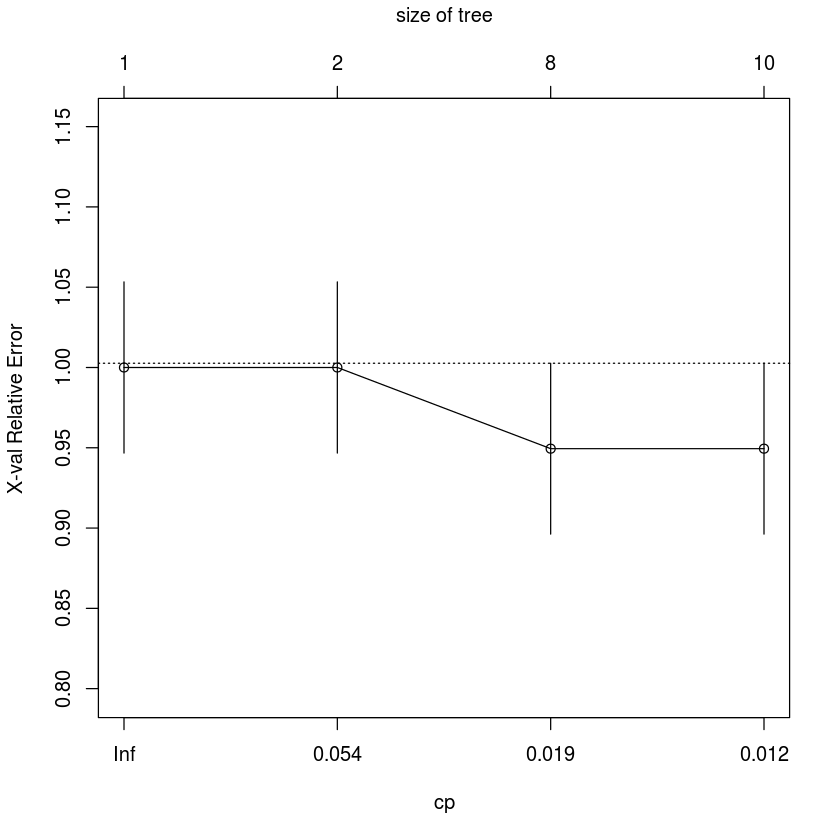

In [116]:
plotcp(model2)

In [117]:
model2 <- prune(model2, cp = 0.025)

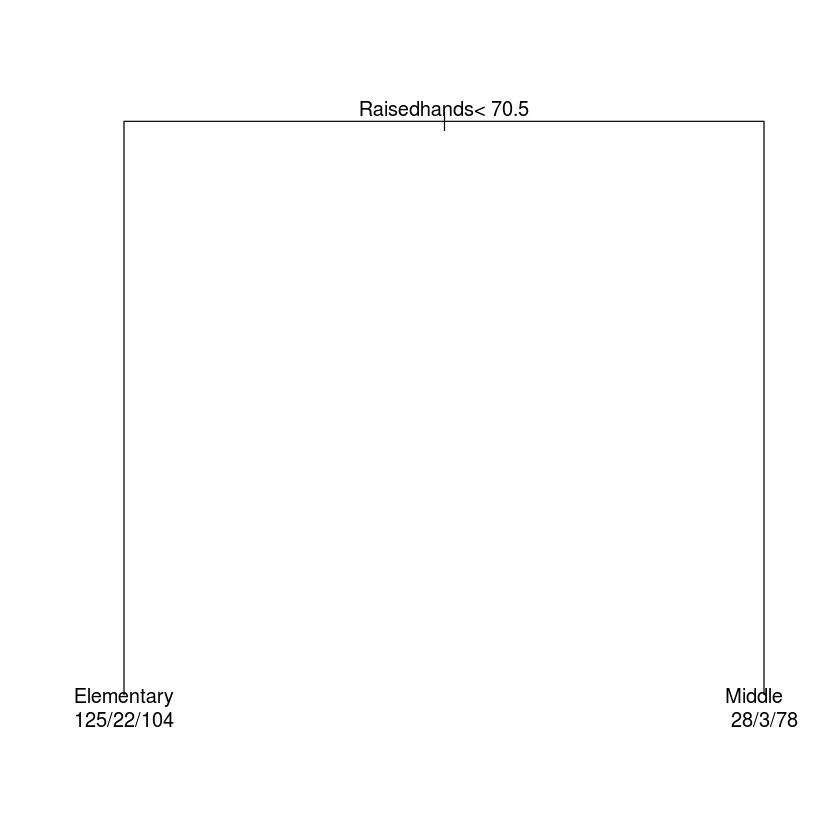

In [118]:
plot(model2)
text(model2, xpd=TRUE, use.n=TRUE, all=FALSE, minlength=10)

In [35]:
testing$prediction <- predict(model2,testing, type="class")

In [36]:
table(testing$StageID,testing$prediction)

            
             Elementary High Middle
  Elementary         38    0      8
  High                7    0      1
  Middle             36    0     30

In [120]:
(38+30)/(38+8+7+1+30+36) #Accuracy

[1] 0.5666667

Not a good model, as it doesn't predict high school. 

# 2 Can I create a model that can predict what topic students will study based off whether or not they have under or above 7 absences, Parental Satisfaction, and Class Size. (Naive Bayes)

In [37]:
library(e1071)

In [48]:
# model3 = naiveBayes(Topic ~ Absences+Parent.Satisfaction+Class.Size, data=training)
model3 = naiveBayes(Topic ~ ., data=training)

In [49]:
model3


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    Arabic    Biology  Chemistry    English     French    Geology    History 
0.11666667 0.06388889 0.05000000 0.09166667 0.12500000 0.04166667 0.04444444 
        IT       Math      Quran    Science    Spanish 
0.21666667 0.04444444 0.04722222 0.10000000 0.05833333 

Conditional probabilities:
           Gender
Y                    F          M
  Arabic    0.30952381 0.69047619
  Biology   0.30434783 0.69565217
  Chemistry 0.55555556 0.44444444
  English   0.45454545 0.54545455
  French    0.44444444 0.55555556
  Geology   0.40000000 0.60000000
  History   0.43750000 0.56250000
  IT        0.32051282 0.67948718
  Math      0.25000000 0.75000000
  Quran     0.47058824 0.52941176
  Science   0.44444444 0.55555556
  Spanish   0.04761905 0.95238095

           Nationality
Y                Egypt       Iran       Iraq     Jordan         KW    Lebanon
  Arabic

In [50]:
predict = predict(model3, testing)

In [51]:
table(predict, testing$Topic)

           
predict     Arabic Biology Chemistry English French Geology History IT Math
  Arabic         2       1         1       3      4       0       0  0    0
  Biology        0       2         0       1      0       0       0  0    0
  Chemistry      0       1         2       0      0       2       0  0    0
  English        1       0         0       2      1       0       0  2    1
  French         3       1         0       1     11       0       0  2    0
  Geology        0       2         2       2      0       7       3  0    0
  History        1       0         0       0      0       0       0  0    0
  IT             2       0         1       3      2       0       0 12    4
  Math           0       0         0       0      0       0       0  1    0
  Quran          2       0         0       0      0       0       0  0    0
  Science        2       0         0       0      2       0       0  0    0
  Spanish        4       0         0       0      0       0       0  0    0


In [121]:
(2+2+2+2+11+7+12+2+1+1)/(2+1+1+3+4+2+1+1+2+2+1+2+1+2+1+3+1+1+11+2+2+2+2+7+3+1+2+1+3+2+12+4+2+1+2+2+2+4)

[1] 0.4285714

# 4 Can I create a model that predicts the gender based off: (Logistic Regression):

Raisedhand
Visted Resource
AnnouncementsView
Discussions
Parent Satisfaction
Absences
Class Size


In [54]:
summary(data)

 Gender     Nationality       PlaceofBirth       StageID        Topic    
 F:175   KW       :179   Kuwait     :180   Elementary:199   IT     : 95  
 M:305   Jordan   :172   Jordan     :176   High      : 33   French : 65  
         Palestine: 28   Iraq       : 22   Middle    :248   Arabic : 59  
         Iraq     : 22   Lebanon    : 19                    Science: 51  
         lebanon  : 16   SaudiArabia: 16                    English: 45  
         Tunis    : 12   USA        : 16                    Biology: 30  
         (Other)  : 51   (Other)    : 51                    (Other):135  
 Semester  Raisedhands     Visted.Resources AnnouncementsView  Discussions   
 F:245    Min.   :  0.00   Min.   : 0.0     Min.   : 0.00     Min.   : 1.00  
 S:235    1st Qu.: 15.75   1st Qu.:20.0     1st Qu.:14.00     1st Qu.:20.00  
          Median : 50.00   Median :65.0     Median :33.00     Median :39.00  
          Mean   : 46.77   Mean   :54.8     Mean   :37.92     Mean   :43.28  
          3rd Qu.:

In [62]:
training$M <- training$Gender == "M"
testing$M <- testing$Gender == "M"

In [63]:
model4 = glm(M ~ Raisedhands+Visted.Resources+AnnouncementsView+Discussions+Parent.Satisfaction+Absences+Class.Size, data=training, family=binomial)
summary(model4)


Call:
glm(formula = M ~ Raisedhands + Visted.Resources + AnnouncementsView + 
    Discussions + Parent.Satisfaction + Absences + Class.Size, 
    family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9972  -1.1644   0.6585   0.9163   1.7433  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)   
(Intercept)              0.4345639  0.6498419   0.669  0.50367   
Raisedhands             -0.0004142  0.0059160  -0.070  0.94418   
Visted.Resources        -0.0078245  0.0057330  -1.365  0.17231   
AnnouncementsView        0.0167907  0.0064584   2.600  0.00933 **
Discussions             -0.0098650  0.0046845  -2.106  0.03521 * 
Parent.SatisfactionGood  0.0214032  0.2626418   0.081  0.93505   
AbsencesUnder-7         -0.3628875  0.3384593  -1.072  0.28364   
Class.SizeL              1.2061933  0.5771428   2.090  0.03662 * 
Class.SizeM              0.7156532  0.3211423   2.228  0.02585 * 
---
Signif. codes:  0 '***' 

In [64]:
model4 = step(model4, direction = "backward", trace = 0)
summary(model4)


Call:
glm(formula = M ~ Visted.Resources + AnnouncementsView + Discussions + 
    Class.Size, family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9866  -1.1842   0.6575   0.9244   1.7592  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        0.080124   0.503325   0.159 0.873520    
Visted.Resources  -0.008314   0.005417  -1.535 0.124852    
AnnouncementsView  0.017564   0.006052   2.902 0.003706 ** 
Discussions       -0.010099   0.004650  -2.172 0.029878 *  
Class.SizeL        1.536827   0.462377   3.324 0.000888 ***
Class.SizeM        0.825789   0.293937   2.809 0.004963 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 473.15  on 359  degrees of freedom
Residual deviance: 434.76  on 354  degrees of freedom
AIC: 446.76

Number of Fisher Scoring iterations: 4


In [65]:
probability = predict(model4, testing, type="response")

In [66]:
probability

7         8        13        15        20        28        29        32 
0.7933919 0.7035064 0.8172082 0.4170243 0.3468670 0.7973373 0.6633532 0.8924832 
       44        45        48        51        62        63        66        69 
0.5492859 0.5620639 0.4558517 0.7319189 0.6182203 0.4386604 0.8454891 0.4546774 
       73        74        82        86       111       117       120       121 
0.8255854 0.7153007 0.6725447 0.8195535 0.4776478 0.5645519 0.4635147 0.5747318 
      123       124       130       139       140       141       146       160 
0.7315436 0.5408009 0.7075669 0.5435531 0.7281415 0.7318310 0.7571802 0.5928332 
      166       169       173       176       178       186       189       191 
0.5387564 0.4300825 0.9032308 0.7847223 0.8606030 0.6562635 0.5545758 0.8078178 
      193       194       200       202       204       207       210       213 
0.6688609 0.6976360 0.5487292 0.5192329 0.6933045 0.7763425 0.5172757 0.4881221 
      219       232       233       234       235       236       241       242 
0.3455467 0.8488507 0.5164415 0.6888894 0.6811875 0.8325786 0.5415918 0.5965151 
      244       251       252       253       268       270       272       274 
0.7196054 0.5469428 0.8009213 0.6824318 0.6440742 0.7638127 0.6060982 0.4394598 
      277       289       290       291       295       298       301       305 
0.5073390 0.6832490 0.6990008 0.8077301 0.7076112 0.5015764 0.8503278 0.6171516 
      314       319       322       327       329       330       331       333 
0.5658847 0.3709079 0.6083941 0.8108889 0.6304218 0.6622757 0.8831800 0.6159685 
      335       337       341       344       353       355       357       358 
0.8426683 0.5736672 0.5768852 0.5786145 0.6716920 0.4479241 0.6186522 0.5692376 
      364       367       368       370       377       387       389       392 
0.4626631 0.8347324 0.6973475 0.4897688 0.6034326 0.3886138 0.8397434 0.7313598 
      408       412       413       416       418       420       422       424 
0.8645795 0.3167592 0.7078469 0.8437674 0.5100468 0.4992091 0.3521295 0.6935585 
      429       432       435       440       441       442       444       446 
0.7752181 0.2803728 0.7935078 0.7770540 0.8236977 0.8296077 0.6701268 0.8507297 
      453       456       462       467       470       471       474       478 
0.7181891 0.5504222 0.7237509 0.4841828 0.7255377 0.7836965 0.7015911 0.6075166

# How do I choose the cut off? Anything above 0.5 is Male, below is Female.

In [69]:
testing$prediction = probability > 0.5

In [70]:
table(testing$M, testing$prediction)

       
        FALSE TRUE
  FALSE     9   34
  TRUE     12   65

# Accuracy

In [86]:
(65+9)/120

[1] 0.6166667

# Precision / Positive Predictive Value

In [89]:
65/(65+9)

[1] 0.8783784

# Why not use accuracy or ppv? 

In [72]:
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [73]:
pred <- prediction(probability, testing$M)

In [74]:
perf <- performance(pred, measure = "acc", x.measure = "ppv")

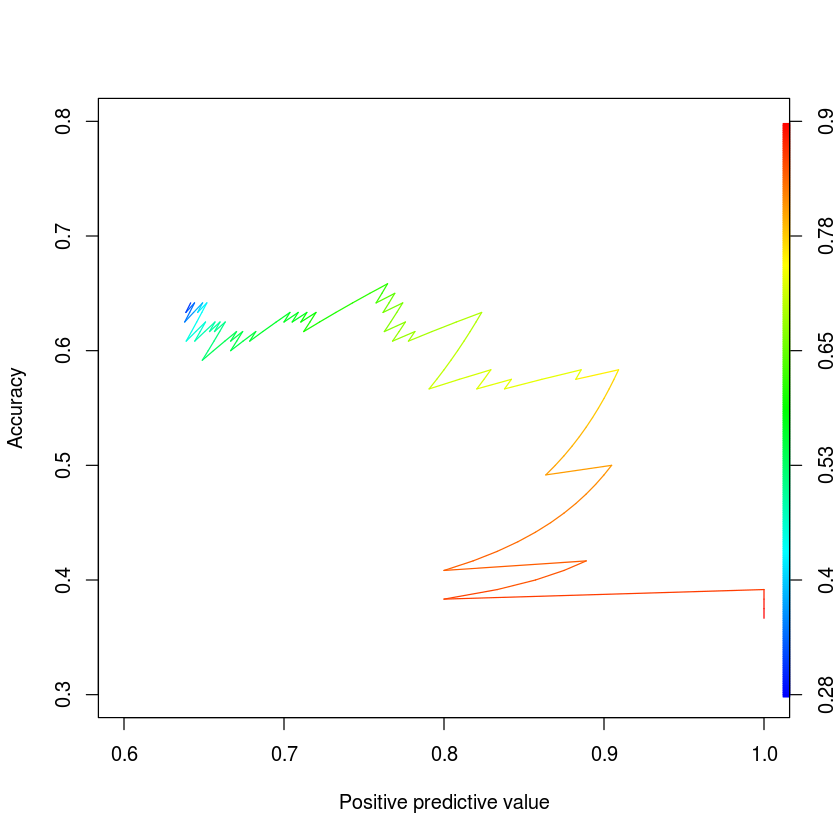

In [76]:
plot(perf, col=rainbow(10), colorize=TRUE, xlim=c(0.6, 1.0), ylim=c(0.3, 0.8))

In [133]:
testing$prediction = probability > 0.65

In [134]:
table(testing$M, testing$prediction)

       
        FALSE TRUE
  FALSE    28   15
  TRUE     28   49

# Accuracy: 

In [135]:
(28+49)/120

[1] 0.6416667

# Precision / Positive Predictive Value

In [136]:
49/(49+15)

[1] 0.765625

# Sensitivity

In [137]:
(28/29)+(28)

[1] 28.96552